In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier

In [49]:
data=pd.read_csv('Machine Downtime.csv')
data.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


In [52]:
data = data.drop(['Date', 'Machine_ID', 'Assembly_Line_No'],axis = 1)

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Hydraulic_Pressure(bar)          2490 non-null   float64
 1   Coolant_Pressure(bar)            2481 non-null   float64
 2   Air_System_Pressure(bar)         2483 non-null   float64
 3   Coolant_Temperature              2488 non-null   float64
 4   Hydraulic_Oil_Temperature(?C)    2484 non-null   float64
 5   Spindle_Bearing_Temperature(?C)  2493 non-null   float64
 6   Spindle_Vibration(?m)            2489 non-null   float64
 7   Tool_Vibration(?m)               2489 non-null   float64
 8   Spindle_Speed(RPM)               2494 non-null   float64
 9   Voltage(volts)                   2494 non-null   float64
 10  Torque(Nm)                       2479 non-null   float64
 11  Cutting(kN)                      2493 non-null   float64
 12  Downtime            

In [56]:
data.describe()

,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature(?C),Spindle_Bearing_Temperature(?C),Spindle_Vibration(?m),Tool_Vibration(?m),Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN)
count,2490.000000,2481.000000,2483.000000,2488.000000,2484.000000,2493.000000,2489.000000,2489.000000,2494.000000,2494.000000,2479.000000,2493.000000
mean,101.409084,4.947058,6.499275,18.559887,47.618317,35.063698,1.009334,25.411975,20274.792302,348.996792,25.234968,2.782551
std,30.289301,0.997357,0.407279,8.554480,3.768674,3.764823,0.342898,6.437142,3852.660056,45.376024,6.138564,0.616688
min,-14.326454,0.325000,5.063480,4.100000,35.200000,22.600000,-0.461000,2.161000,0.000000,202.000000,0.000000,1.800000
25%,76.355000,4.462464,6.217987,10.400000,45.100000,32.500000,0.777000,21.089000,17919.000000,319.000000,21.666115,2.250000
50%,96.763486,4.939960,6.505191,21.200000,47.700000,35.100000,1.008000,25.455000,20137.500000,349.000000,24.647736,2.780000
75%,126.415727,5.518401,6.780550,25.600000,50.100000,37.600000,1.236000,29.790000,22501.750000,380.000000,30.514008,3.270000
max,191.000000,11.350000,7.973992,98.200000,61.400000,49.500000,2.000000,45.726000,27957.000000,479.000000,55.552400,3.930000


In [58]:
data['Downtime'] = data['Downtime'].map({'No_Machine_Failure': 0, 'Machine_Failure': 1})

# EDA

In [61]:
data.isna().sum()

Hydraulic_Pressure(bar)            10
Coolant_Pressure(bar)              19
Air_System_Pressure(bar)           17
Coolant_Temperature                12
Hydraulic_Oil_Temperature(?C)      16
Spindle_Bearing_Temperature(?C)     7
Spindle_Vibration(?m)              11
Tool_Vibration(?m)                 11
Spindle_Speed(RPM)                  6
Voltage(volts)                      6
Torque(Nm)                         21
Cutting(kN)                         7
Downtime                            0
dtype: int64

In [63]:

## Filling NA value with mean
columns_with_nulls = []
for column in data.columns:
    if data[column].isna().sum() > 0:
        columns_with_nulls.append(column)

for col in columns_with_nulls:
    data[col] = data[col].fillna(data[col].mean())
data.isna().sum()

Hydraulic_Pressure(bar)            0
Coolant_Pressure(bar)              0
Air_System_Pressure(bar)           0
Coolant_Temperature                0
Hydraulic_Oil_Temperature(?C)      0
Spindle_Bearing_Temperature(?C)    0
Spindle_Vibration(?m)              0
Tool_Vibration(?m)                 0
Spindle_Speed(RPM)                 0
Voltage(volts)                     0
Torque(Nm)                         0
Cutting(kN)                        0
Downtime                           0
dtype: int64

## Univariate Analysis

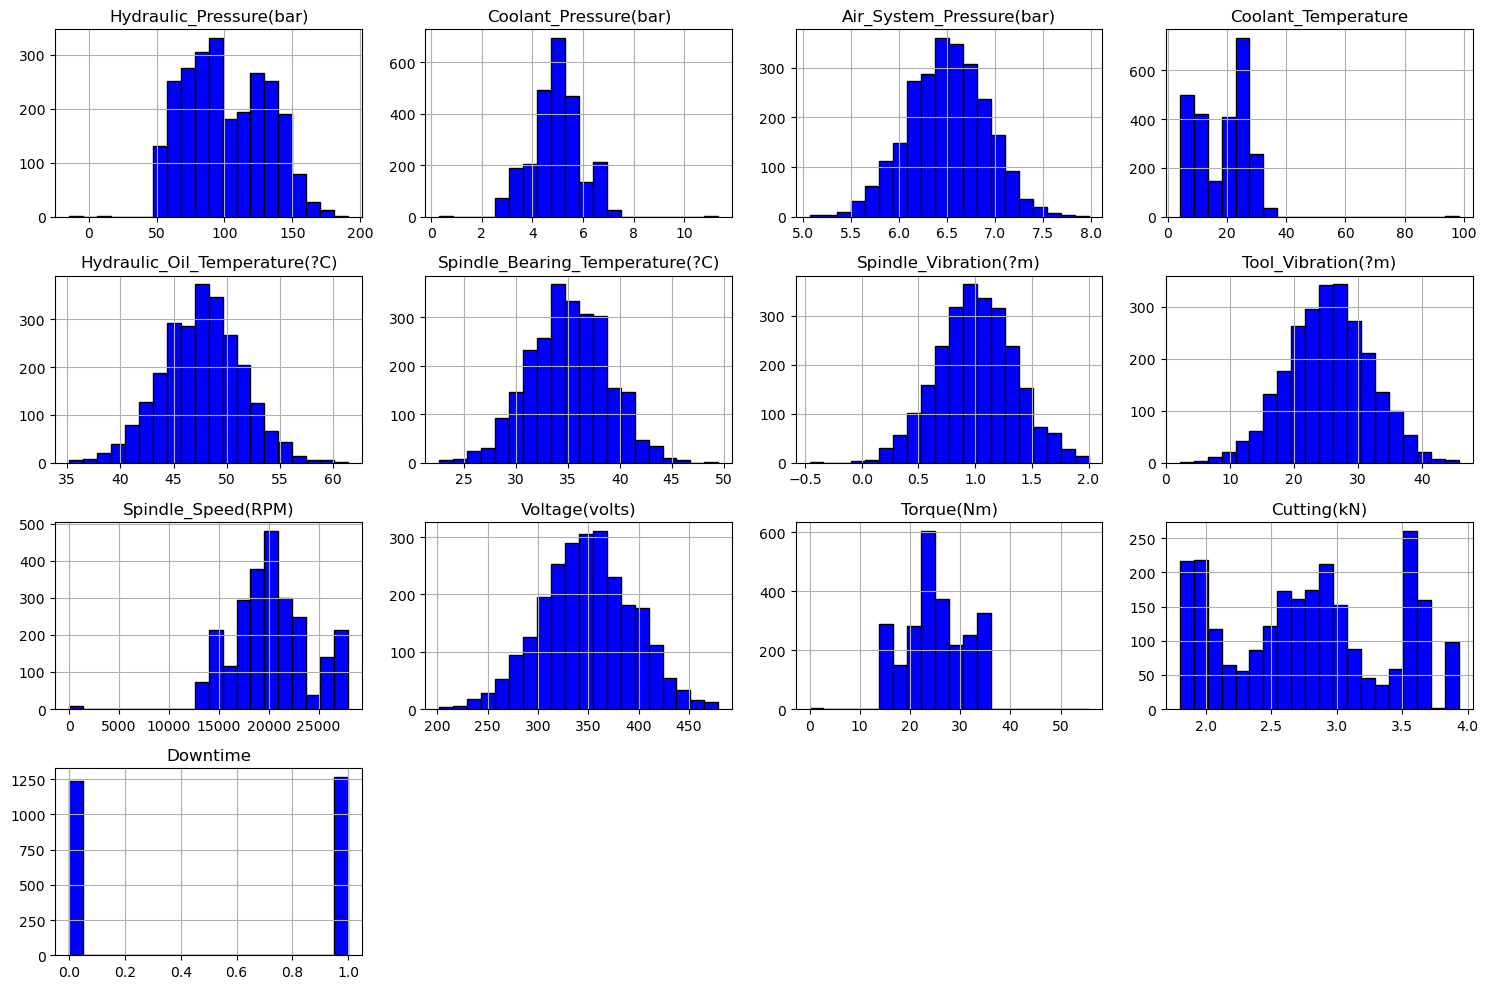

In [66]:
# Histogram for numerical columns
data.hist(figsize=(15, 10), bins=20, color='blue', edgecolor='black')
plt.tight_layout()
plt.show()


## Bivariate Analysis

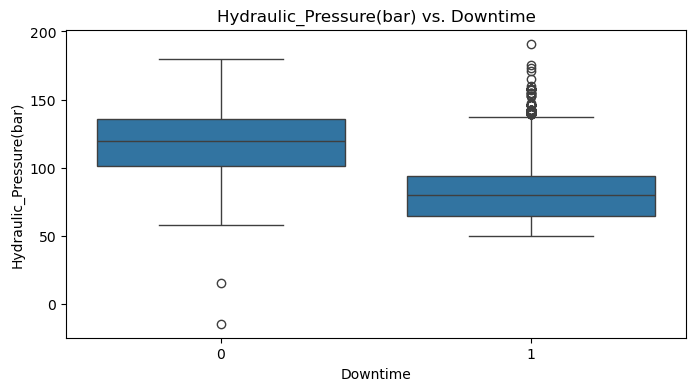

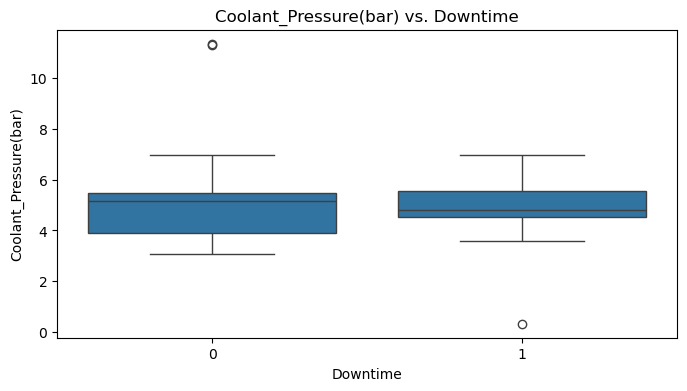

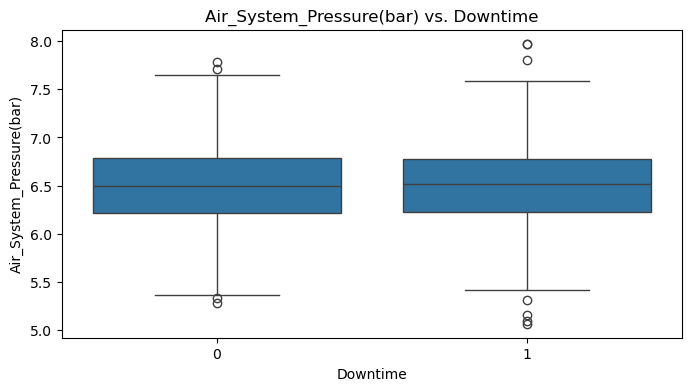

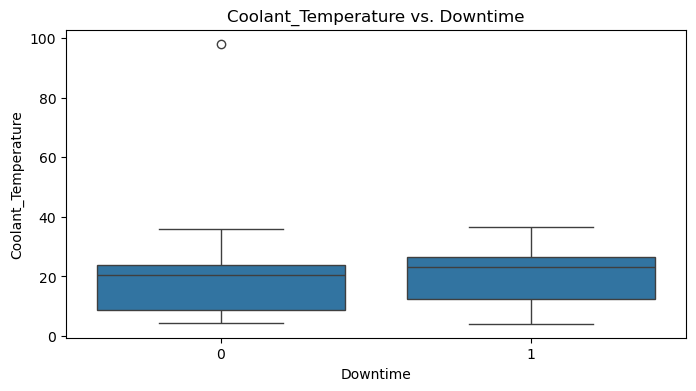

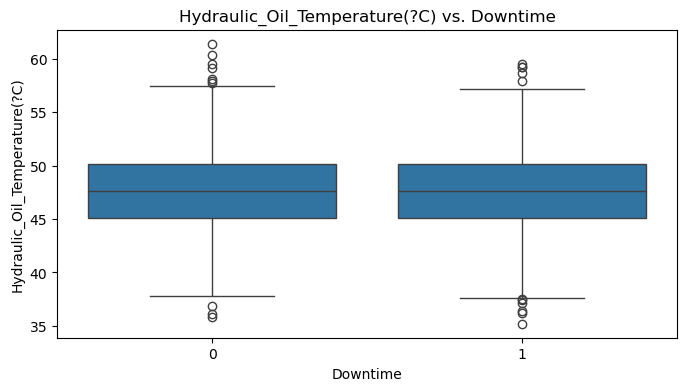

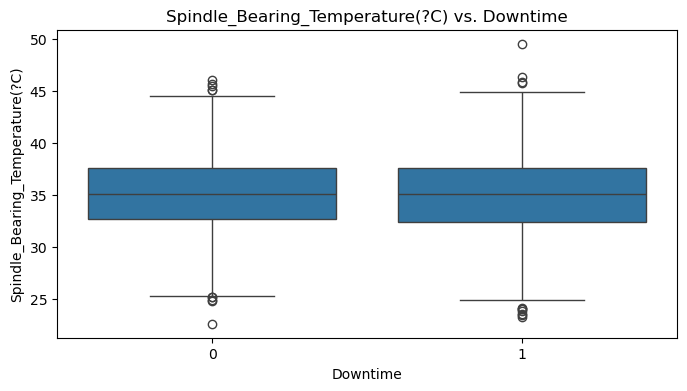

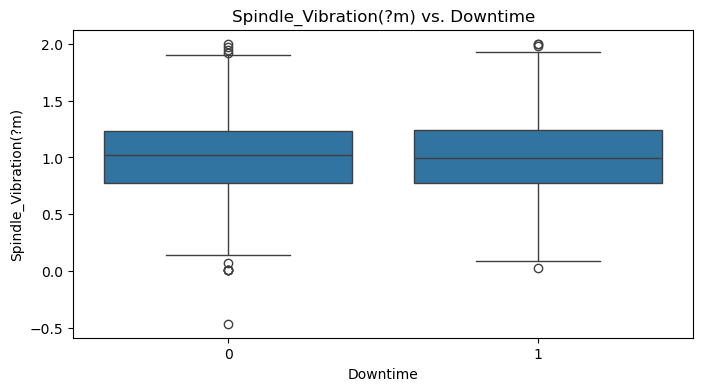

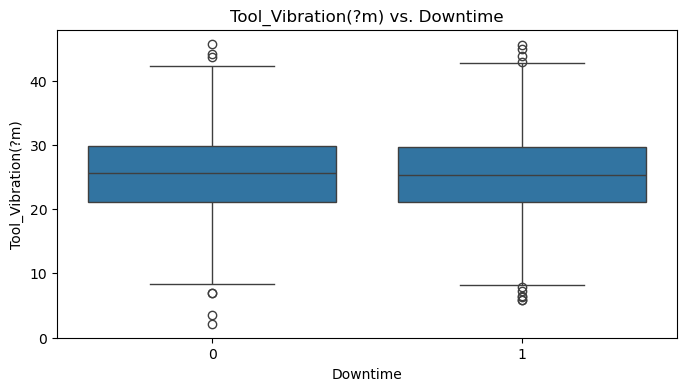

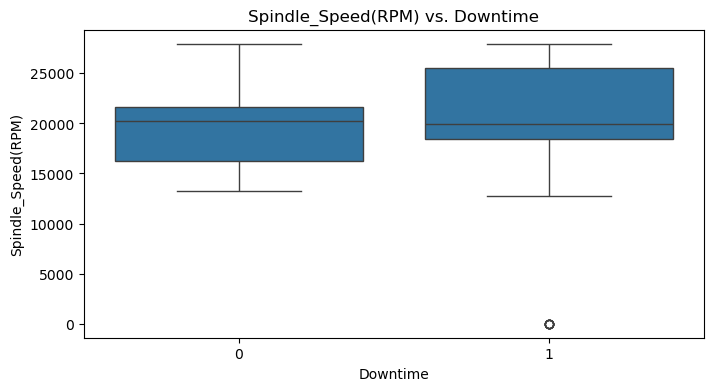

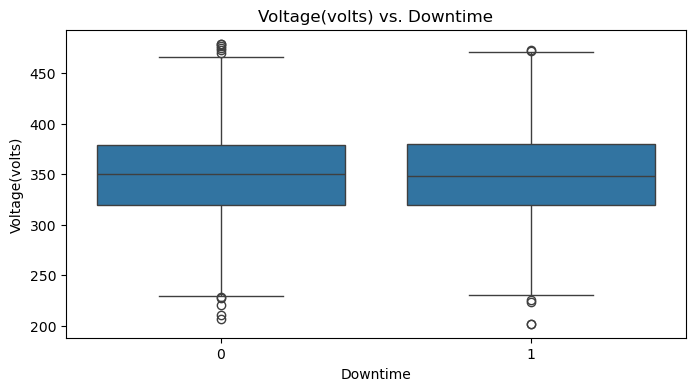

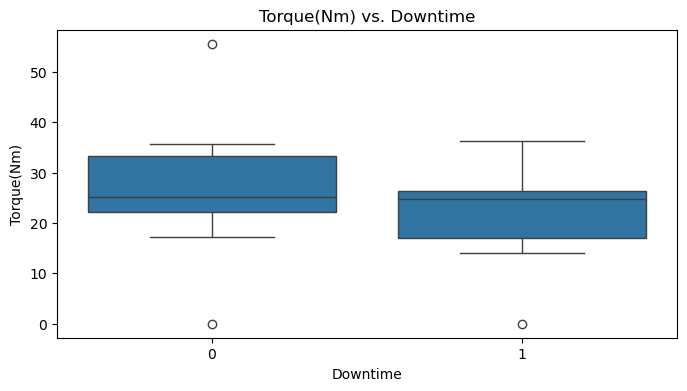

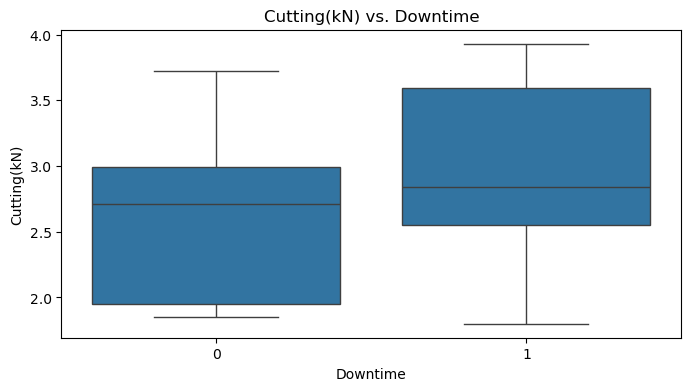

In [69]:
# Boxplots for numerical features
numerical_cols = [
    'Hydraulic_Pressure(bar)', 'Coolant_Pressure(bar)', 'Air_System_Pressure(bar)',
    'Coolant_Temperature', 'Hydraulic_Oil_Temperature(?C)', 'Spindle_Bearing_Temperature(?C)',
    'Spindle_Vibration(?m)', 'Tool_Vibration(?m)', 'Spindle_Speed(RPM)',
    'Voltage(volts)', 'Torque(Nm)', 'Cutting(kN)'
]

for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x='Downtime', y=col, data=data)
    plt.title(f"{col} vs. Downtime")
    plt.show()


## Correlation Analysis

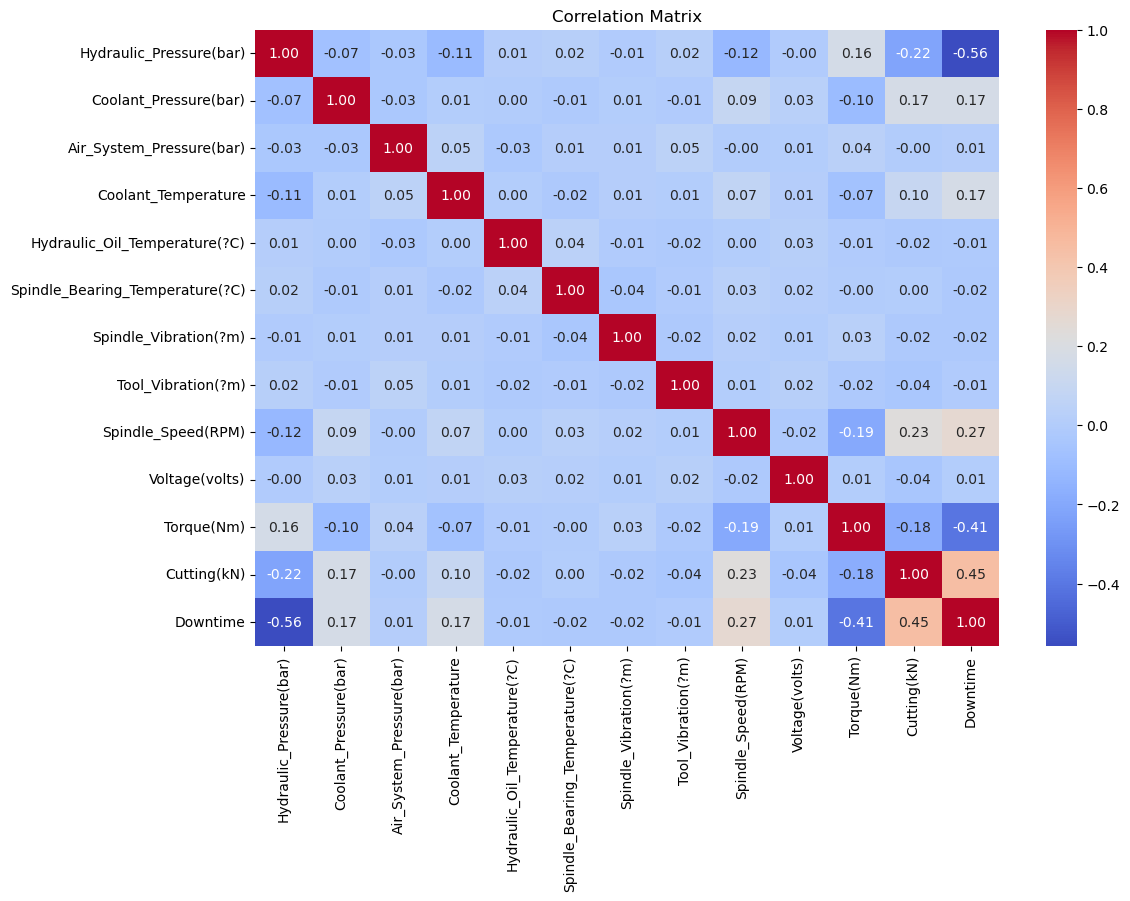

In [72]:
# Correlation matrix
correlation_matrix = data.corr()

# Heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)
plt.title("Correlation Matrix")
plt.show()


In [74]:
downtime_correlation = correlation_matrix['Downtime'].sort_values(ascending=False)
print(downtime_correlation)

Downtime                           1.000000
Cutting(kN)                        0.449456
Spindle_Speed(RPM)                 0.274788
Coolant_Pressure(bar)              0.171003
Coolant_Temperature                0.168816
Air_System_Pressure(bar)           0.009182
Voltage(volts)                     0.005845
Tool_Vibration(?m)                -0.005876
Hydraulic_Oil_Temperature(?C)     -0.012606
Spindle_Vibration(?m)             -0.016628
Spindle_Bearing_Temperature(?C)   -0.019444
Torque(Nm)                        -0.406778
Hydraulic_Pressure(bar)           -0.557075
Name: Downtime, dtype: float64


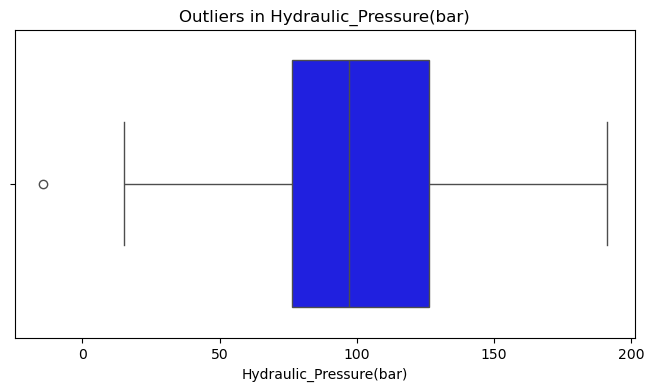

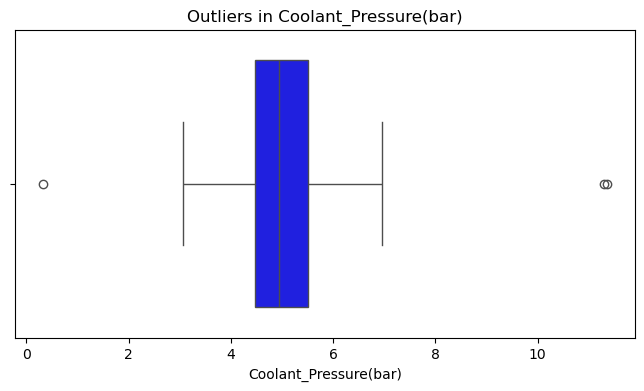

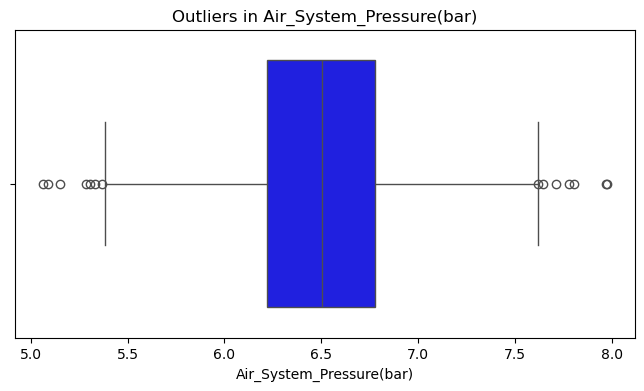

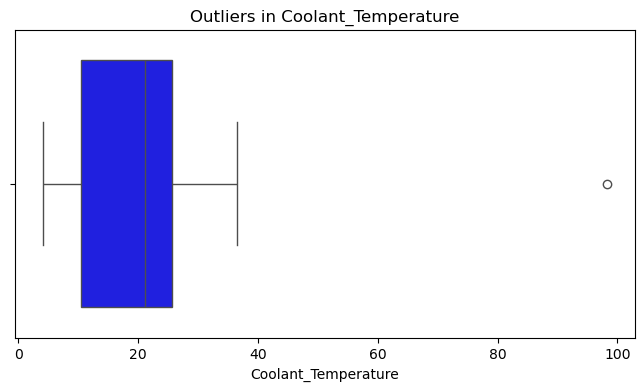

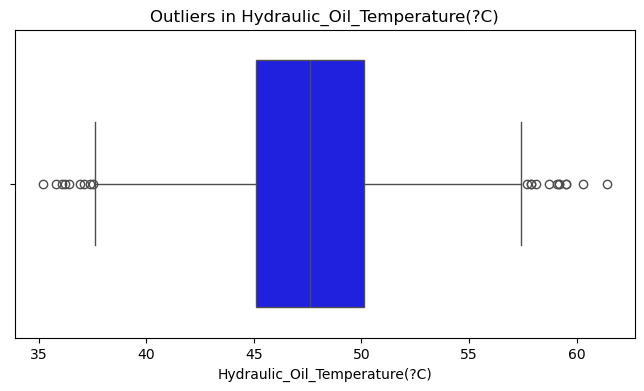

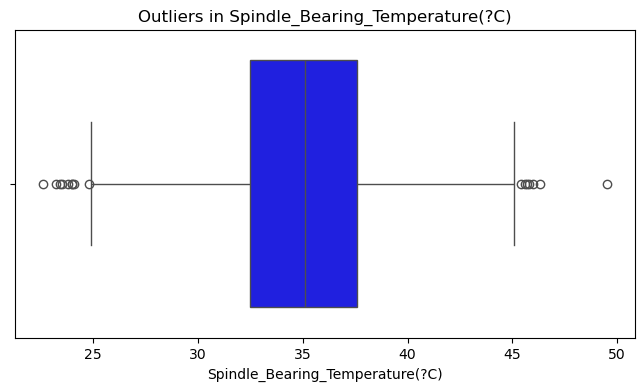

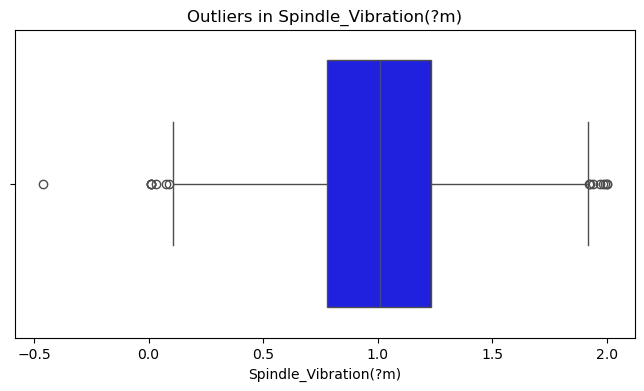

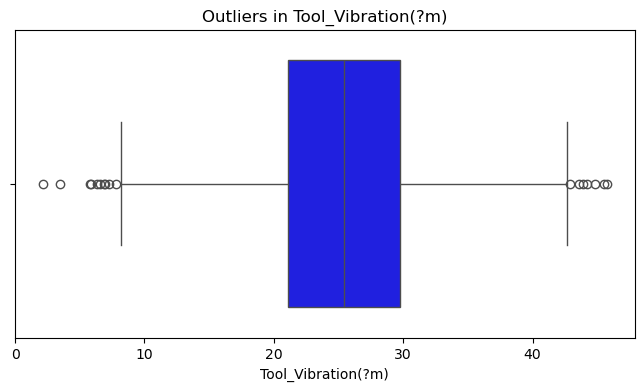

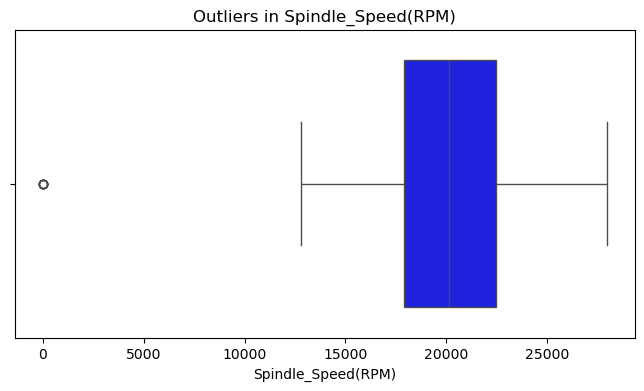

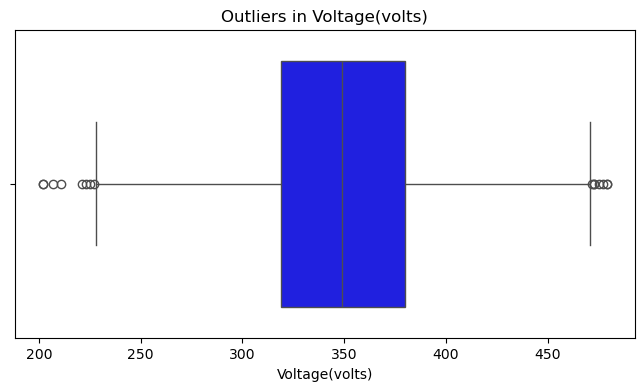

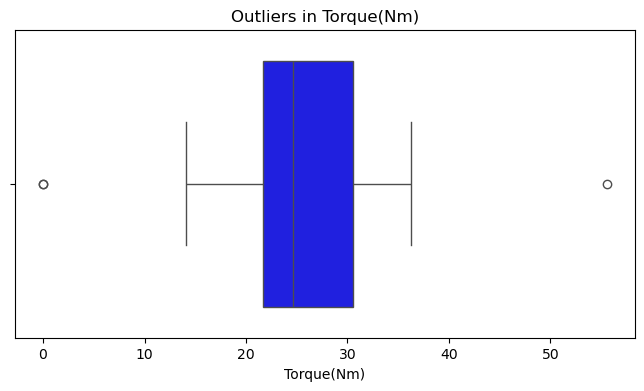

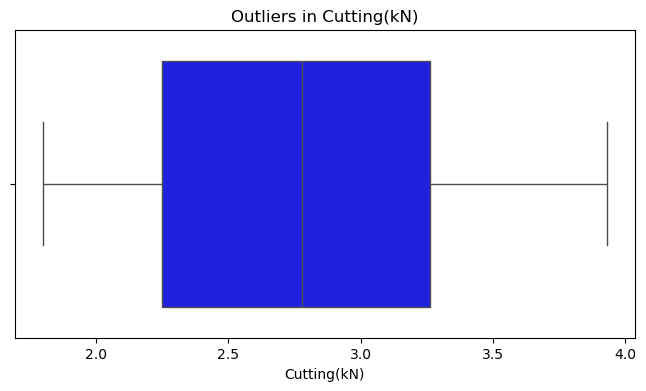

In [77]:
# Boxplots for outlier detection
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[col], color='blue')
    plt.title(f"Outliers in {col}")
    plt.show()


In [79]:

def filter_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]
    return filtered_df

In [81]:
# Apply the filter_outliers function to each numerical column
for col in numerical_cols:
    df = filter_outliers(data, col)

print("Filtered Data Shape:", df.shape)


Filtered Data Shape: (2500, 13)


In [152]:
## split into train test 
X = data.drop("Downtime",axis = 1)
y = data['Downtime']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [154]:
## StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [157]:
regre_model = LogisticRegression()
regre_model.fit(X_train, y_train)
y_pred = regre_model.predict(X_test)

In [159]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.84
Confusion Matrix:
[[227  42]
 [ 39 192]]
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       269
           1       0.82      0.83      0.83       231

    accuracy                           0.84       500
   macro avg       0.84      0.84      0.84       500
weighted avg       0.84      0.84      0.84       500



In [161]:
log_reg_probs = regre_model.predict_proba(X_test)[:, 1]

In [163]:
log_reg_probs

array([3.58006207e-01, 1.73113240e-01, 1.89758367e-02, 9.31863117e-01,
       7.63768067e-01, 3.36838832e-01, 4.80077219e-02, 7.75092474e-01,
       9.64240701e-01, 9.88506496e-01, 1.61248790e-01, 9.53843519e-01,
       6.37906935e-01, 9.53978162e-01, 6.21899560e-01, 3.64537623e-01,
       3.17636563e-01, 1.19315285e-01, 2.52152920e-03, 4.19126989e-01,
       4.34496225e-01, 6.71449083e-01, 2.90099771e-01, 9.09911631e-01,
       4.65944466e-01, 5.14634546e-01, 5.85647002e-02, 6.49863189e-01,
       6.40840800e-03, 4.67730744e-02, 7.84773023e-01, 9.53621289e-01,
       5.78117703e-01, 9.36176316e-01, 1.67064453e-02, 2.95773183e-01,
       9.75442001e-01, 6.09966359e-01, 4.84547075e-01, 9.13647055e-01,
       3.83732358e-03, 8.28692100e-02, 6.54013383e-01, 4.67156170e-02,
       7.54654276e-01, 3.14654956e-02, 4.74887890e-01, 1.56392333e-01,
       7.36181340e-01, 8.64684196e-01, 2.11437870e-01, 1.00025384e-01,
       1.54011988e-02, 8.35818433e-01, 9.75194086e-01, 1.47588259e-01,
      

## Decision Tree

In [221]:
DT = DecisionTreeClassifier(max_depth=5, random_state=42)
DT.fit(X_train,y_train)
DT_y_pred=DT.predict(X_test)
DT_y_pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [241]:
DT.predict_proba(X_test)[4][DT_y_pred[4]]

0.9638418079096045

In [225]:
DT.predict_proba(X_test)[0][DT_y_pred[0]]

0.9578947368421052

In [209]:
dec_tree_probs = DT.predict_proba(X_test)[0][DT_y_pred]

In [211]:
dec_tree_probs

array([0.95789474, 0.95789474, 0.95789474, 0.04210526, 0.04210526,
       0.04210526, 0.95789474, 0.04210526, 0.04210526, 0.04210526,
       0.95789474, 0.04210526, 0.95789474, 0.04210526, 0.04210526,
       0.95789474, 0.04210526, 0.95789474, 0.95789474, 0.95789474,
       0.04210526, 0.04210526, 0.95789474, 0.04210526, 0.04210526,
       0.95789474, 0.95789474, 0.95789474, 0.95789474, 0.95789474,
       0.04210526, 0.04210526, 0.95789474, 0.04210526, 0.95789474,
       0.95789474, 0.04210526, 0.04210526, 0.04210526, 0.04210526,
       0.95789474, 0.95789474, 0.04210526, 0.95789474, 0.04210526,
       0.95789474, 0.95789474, 0.95789474, 0.95789474, 0.04210526,
       0.04210526, 0.95789474, 0.95789474, 0.04210526, 0.04210526,
       0.95789474, 0.95789474, 0.95789474, 0.95789474, 0.95789474,
       0.95789474, 0.04210526, 0.95789474, 0.04210526, 0.04210526,
       0.04210526, 0.95789474, 0.95789474, 0.04210526, 0.95789474,
       0.95789474, 0.04210526, 0.04210526, 0.95789474, 0.95789

In [173]:
accuracy = accuracy_score(y_test, DT_y_pred)
conf_matrix = confusion_matrix(y_test, DT_y_pred)
class_report = classification_report(y_test, DT_y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.97
Confusion Matrix:
[[258  11]
 [  6 225]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97       269
           1       0.95      0.97      0.96       231

    accuracy                           0.97       500
   macro avg       0.97      0.97      0.97       500
weighted avg       0.97      0.97      0.97       500



In [106]:
import joblib
joblib.dump(DT, 'decision_tree_model.pkl')
joblib.dump(scaler, 'standard_scaler.pkl')

['standard_scaler.pkl']

In [110]:

# Load the pre-trained model and scaler
model = joblib.load('decision_tree_model.pkl')
scaler = joblib.load('standard_scaler.pkl')  